# Convolution and CNN demo

CPSC 340: Machine Learning and Data Mining

The University of British Columbia

2018 Winter Term 1

Mike Gelbart

In [1]:
import numpy as np
from scipy.signal import convolve2d
from skimage.io import imshow, imread # TODO: use matplotlib
from skimage.color import rgb2gray
from skimage.transform import resize
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
def preprocess_image(filename):
    img = imread(filename) # read in the image
    img = resize(img, (100,100), mode='reflect') # resize it if you want
    # above: the mode='constant' is just to avoid a warning, I don't expect the original
    # image to be smaller than 100x100
    return rgb2gray(img) # make it grayscale

def show_conv(img, filt):

    plt.figure(figsize=(8,16))
    plt.subplot(1,2,1)
    
    plt.imshow(img, cmap='gray')
    plt.xticks(())
    plt.yticks(())
    plt.title("original")
    I_filt = convolve2d(img,filt, boundary='symm', mode='same')

    plt.subplot(1,2,2)
    if np.sum(filt) == 0: # a trick to make the images easier to see, not part of the "math"
        I_filt = np.abs(I_filt)/np.max(np.abs(I_filt))

    I_filt = np.maximum(0, I_filt) # set negative values to 0, for visualization purposes
    I_filt = np.minimum(1, I_filt) # set values greater than 1 to 1, for visualization purposes

    plt.imshow(I_filt, cmap='gray')

    plt.xticks(())
    plt.yticks(())
    plt.title("filtered")

    return I_filt

## Some examples of convolutions with an image of bricks

#### original image

/Users/mgelbart/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


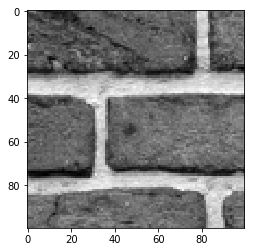

In [3]:
img = preprocess_image(os.path.join("img", "bricks_smaller.jpg"))
plt.imshow(img, cmap='gray');

#### horizontal blurring

(1, 10)
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]


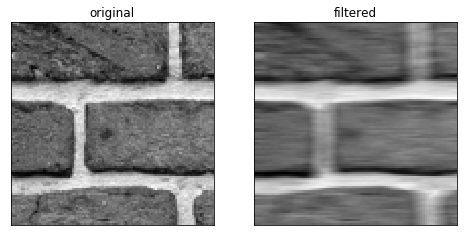

In [4]:
ft1 = 0.1*np.ones(10)[None]
print(ft1.shape)
print(ft1)

res2 = show_conv(img, ft1)

#### vertical blurring

(10, 1)
[[0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]]


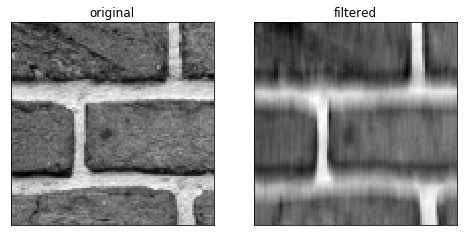

In [5]:
ft2 = ft1.T
print(ft2.shape)
print(ft2)
res2 = show_conv(img, ft2)

#### blurring in both directions

(10, 10)


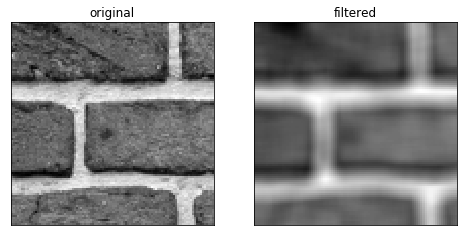

In [6]:
ft5 = 0.01*np.ones((10,10))
print(ft5.shape)
res5 = show_conv(img, ft5)

#### Horizontal derivatives

(1, 3)
[[-1  0  1]]


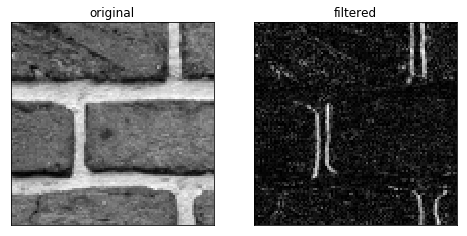

In [7]:
ft3 = np.array([-1, 0, 1])[None]
print(ft3.shape)
print(ft3)
res3 = show_conv(img, ft3)

#### Vertical derivatives

(3, 1)
[[-1]
 [ 0]
 [ 1]]


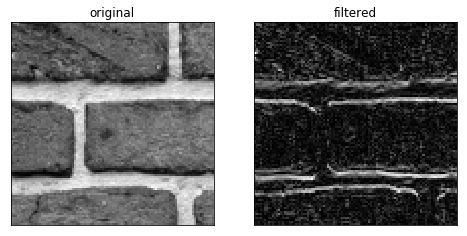

In [8]:
ft4 = ft3.T
print(ft4.shape)
print(ft4)
res4 = show_conv(img, ft4)

#### Sum of vertical and horizontal derivatives

(3, 3)
[[-2 -1  0]
 [-1  0  1]
 [ 0  1  2]]


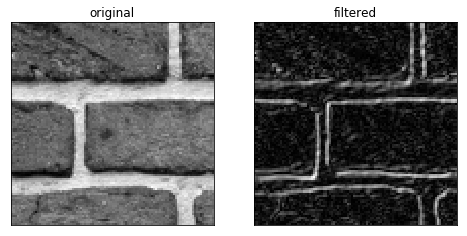

In [9]:
ft6 = ft3+ft4
print(ft6.shape)
print(ft6)
res6 = show_conv(img, ft6)

#### Increased intensity

(1, 1)
[[2.]]


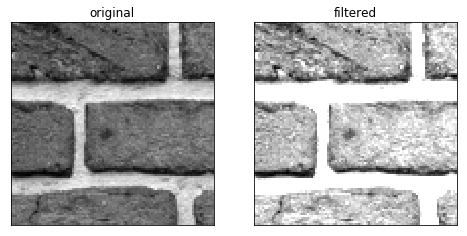

In [10]:
ft7 = np.ones((1,1))*2
print(ft7.shape)
print(ft7)
res6 = show_conv(img, ft7)

## Convolutions as matrix multiplication (bonus)

Create an example signal:

In [21]:
x = np.random.randint(0, 10, size=10)
x

array([4, 3, 1, 6, 0, 3, 6, 7, 7, 1])

Convolve it with an averaging filter of width 5....

In [26]:
w = np.ones(5)/5
np.convolve(x,w,mode='valid')

array([2.8, 2.6, 3.2, 4.4, 4.6, 4.8])

Create the matrix version

In [27]:
import scipy.linalg
W = scipy.linalg.toeplitz([1/5,0,0,0,0,0],[1/5,1/5,1/5,1/5,1/5,0,0,0,0,0])
W

array([[0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2]])

See that the result is the same as the convolution

In [28]:
W@x

array([2.8, 2.6, 3.2, 4.4, 4.6, 4.8])

If you care about boundary conditions, here's another one that returns an output that's the same size as the input:

In [29]:
np.convolve(x,w,mode='same')

array([1.6, 2.8, 2.8, 2.6, 3.2, 4.4, 4.6, 4.8, 4.2, 3. ])

In [36]:
Wsame = np.vstack(([0.2,0.2,0.2,0,0,0,0,0,0,0],[0.2,0.2,0.2,0.2,0,0,0,0,0,0],W,[0,0,0,0,0,0,0.2,0.2,0.2,0.2],[0,0,0,0,0,0,0,0.2,0.2,0.2]))
Wsame

array([[0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.2]])

In [35]:
Wsame@x

array([1.6, 2.8, 2.8, 2.6, 3.2, 4.4, 4.6, 4.8, 4.2, 3. ])